PREDICTING CUSTOMER RETENTION USING MACHINE LEARNING

In [1]:
#Import the requiredlibraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import*
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import statsmodels.api as sms;

In [2]:
#Import the data
df = pd.read_csv('C:/Users/USER/Merged_file.csv')
df.head()

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,9,10,14,15,19,20,21,23,28,29,30,32,33,34,36,41,42,45,46,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,80,81,85,86,87,88,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,...,Language,Outstanding Amount,Loyalty Points,Number of Employees,Agent_Name,Unnamed: 34,Unnamed: 35,Debt Amount,Number of employees,Upload restuarant location
0,0,11262518.0,ORDERED,Flour & Sugar,KNFS0001,NaN,NaN,5.0,20850.0,20370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,11262518.0,ORDERED,Spreads,KNSP2001,NaN,NaN,1.0,325.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,11261796.0,DISPATCHED,Flour & Sugar,KNFS0001,NaN,NaN,5.0,20850.0,20370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,11261796.0,DISPATCHED,Spreads,KNSP2001,NaN,NaN,1.0,325.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,11261341.0,ORDERED,Spreads,KNSP2001,NaN,NaN,6.0,325.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Printing out all the columns in order to decipher the necessary ones to be used for customer retention
df.columns


Index(['Unnamed: 0', 'Order ID', 'Order Status', 'Category Name', 'SKU',
       'Customization Group', 'Customization Option', 'Quantity', 'Unit Price',
       'Cost Price', 'Total Cost Price', 'Total Price', 'Order Total',
       'Sub Total', 'Tax', 'Delivery Charge', 'Tip', 'Discount',
       'Remaining Balance', 'Payment Method', 'Additional Charge',
       'Taxable Amount', 'Transaction ID', 'Currency Symbol',
       'Transaction Status', 'Promo Code', 'Customer ID', 'Merchant ID',
       'Store Name', 'Pickup Address', 'Description', 'Distance (in km)',
       'Order Time', 'Pickup Time', 'Delivery Time', 'Ratings', 'Reviews',
       'Merchant Earning', 'Commission Amount', 'Commission Payout Status',
       'Order Preparation Time', 'Redeemed Loyalty Points',
       'Consumed Loyalty Points', 'Cancellation Reason', 'Flat Discount',
       'Checkout Template Name', 'Checkout Template Value', 'Task_ID',
       'Order_ID', 'Relationship', 'Team_Name', 'Task_Type', 'Notes',
       'A

In [4]:
#Printing out the selected columns and relabelling it as df2
df2 = df[["Order ID", "Order Status", "Quantity", "Redeemed Loyalty Points", "Total Price", "Customer ID", "Ratings", 
          "Relationship","Loyalty Points",]]
df2.head()

,Order ID,Order Status,Quantity,Redeemed Loyalty Points,Total Price,Customer ID,Ratings,Relationship,Loyalty Points
0,11262518.0,ORDERED,5.0,-,104250.0,4645484.0,NaN,NaN,NaN
1,11262518.0,ORDERED,1.0,-,325.0,4645484.0,NaN,NaN,NaN
2,11261796.0,DISPATCHED,5.0,-,104250.0,4420776.0,NaN,NaN,NaN
3,11261796.0,DISPATCHED,1.0,-,325.0,4420776.0,NaN,NaN,NaN
4,11261341.0,ORDERED,6.0,-,1950.0,5156201.0,NaN,NaN,NaN


In [5]:
## checking out for duplicates and eliminating them
df2.drop_duplicates()

,Order ID,Order Status,Quantity,Redeemed Loyalty Points,Total Price,Customer ID,Ratings,Relationship,Loyalty Points
0,11262518.0,ORDERED,5.0,-,104250.0,4645484.0,NaN,NaN,NaN
1,11262518.0,ORDERED,1.0,-,325.0,4645484.0,NaN,NaN,NaN
2,11261796.0,DISPATCHED,5.0,-,104250.0,4420776.0,NaN,NaN,NaN
3,11261796.0,DISPATCHED,1.0,-,325.0,4420776.0,NaN,NaN,NaN
4,11261341.0,ORDERED,6.0,-,1950.0,5156201.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
71940,NaN,NaN,NaN,NaN,NaN,5188032.0,NaN,NaN,0.0
71941,NaN,NaN,NaN,NaN,NaN,5188161.0,NaN,NaN,0.0
71942,NaN,NaN,NaN,NaN,NaN,5188263.0,NaN,NaN,0.0
71943,NaN,NaN,NaN,NaN,NaN,5188431.0,NaN,NaN,0.0


In [6]:
#hecking out for Not a Number value and eliminating them
df2.isnull().sum()


Order ID                   58274
Order Status               58274
Quantity                   58274
Redeemed Loyalty Points    58274
Total Price                58274
Customer ID                53002
Ratings                    71913
Relationship               18943
Loyalty Points             66673
dtype: int64

In [7]:
#filling the NAN with 1s
df2 = df2.fillna(1)
df2.isnull().sum()

Order ID                   0
Order Status               0
Quantity                   0
Redeemed Loyalty Points    0
Total Price                0
Customer ID                0
Ratings                    0
Relationship               0
Loyalty Points             0
dtype: int64

In [8]:
df2.head()

,Order ID,Order Status,Quantity,Redeemed Loyalty Points,Total Price,Customer ID,Ratings,Relationship,Loyalty Points
0,11262518.0,ORDERED,5.0,-,104250.0,4645484.0,1.0,1.0,1.0
1,11262518.0,ORDERED,1.0,-,325.0,4645484.0,1.0,1.0,1.0
2,11261796.0,DISPATCHED,5.0,-,104250.0,4420776.0,1.0,1.0,1.0
3,11261796.0,DISPATCHED,1.0,-,325.0,4420776.0,1.0,1.0,1.0
4,11261341.0,ORDERED,6.0,-,1950.0,5156201.0,1.0,1.0,1.0


In [9]:
#assigning the predictors to the X feature
X_feature = df2[['Total Price','Quantity' ]]

In [10]:
X_feature.head()

,Total Price,Quantity
0,104250.0,5.0
1,325.0,1.0
2,104250.0,5.0
3,325.0,1.0
4,1950.0,6.0


In [11]:
#assigning the outcome to the Y target
y_target = df2[['Loyalty Points']]

In [12]:
y_target

,Loyalty Points
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
71940,0.0
71941,0.0
71942,0.0
71943,0.0


In [13]:
%time
# import train_test_split to split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, random_state=1)

Wall time: 0 ns


In [14]:
print(X_train.shape)
print( X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53958, 2)
(17987, 2)
(53958, 1)
(17987, 1)


In [16]:
#importing the regression model
from sklearn.linear_model import LogisticRegression
logReg =LogisticRegression(solver='liblinear', max_iter=200, random_state = 1).fit(X_train, y_train)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
logReg.coef_

array([[-1.12583521, -1.07485692],
       [ 0.80823148,  0.75459264],
       [-2.15219823, -2.10316771],
       [-1.56963266, -1.51989422],
       [-2.29297572, -2.24407065],
       [-2.31915132, -2.27026922],
       [-2.28052141, -2.23160538],
       [-2.31244142, -2.26355343],
       [-2.58057954, -2.5325234 ],
       [-2.4875355 , -2.43929723],
       [-2.46482585, -2.41654418],
       [-2.53778144, -2.48964074],
       [-2.49945656, -2.45124125],
       [-2.49945656, -2.45124125],
       [-2.64640455, -2.59848045],
       [-2.69723354, -2.65040713],
       [-2.82967628, -2.78346896],
       [-2.90016822, -2.8543102 ],
       [-2.5245521 , -2.47638552],
       [-2.82967628, -2.78346896],
       [-2.40435361, -2.35595888],
       [-2.27444251, -2.22552112],
       [-2.56575948, -2.51767393],
       [-2.41373199, -2.36535453],
       [-2.56575948, -2.51767393],
       [-2.53778144, -2.48964074],
       [-2.56575948, -2.51767393],
       [-2.69723354, -2.65040713],
       [-2.69723354,

In [18]:
#checking the accuracy score
logReg.score(X_train,y_train)

0.9277215612142777

In [19]:
#Checking the confusion matrix
confusion_matrix(y_train,logReg.predict(X_train))

array([[    0,  1584,     0, ...,     0,     0,     0],
       [    0, 50058,     0, ...,     0,     0,     0],
       [    0,    73,     0, ...,     0,     0,     0],
       ...,
       [    0,     1,     0, ...,     0,     0,     0],
       [    0,     1,     0, ...,     0,     0,     0],
       [    0,     1,     0, ...,     0,     0,     0]], dtype=int64)

In [20]:
print(classification_report(y_train, logReg.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1584
         1.0       0.93      1.00      0.96     50058
         2.0       0.00      0.00      0.00        73
         3.0       0.00      0.00      0.00       423
         4.0       0.00      0.00      0.00        46
         5.0       0.00      0.00      0.00        42
         6.0       0.00      0.00      0.00        48
         7.0       0.00      0.00      0.00        43
         8.0       0.00      0.00      0.00        18
         9.0       0.00      0.00      0.00        25
        10.0       0.00      0.00      0.00        27
        11.0       0.00      0.00      0.00        21
        12.0       0.00      0.00      0.00        24
        13.0       0.00      0.00      0.00        24
        14.0       0.00      0.00      0.00        14
        15.0       0.00      0.00      0.00        12
        16.0       0.00      0.00      0.00         7
        17.0       0.00    

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
y_pred = logReg.predict(X_test)


In [22]:
#calculating the MSE
from sklearn import metrics
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

172.22106808333956


In [23]:
print ('actual:', y_test.values[0:30])
print ('predicted:')

actual: [[ 1.]
 [58.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
predicted:


In [24]:
print('True', y_test.values[0:10])
print()
print('pred', y_pred[0:10])

True [[ 1.]
 [58.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]

pred [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


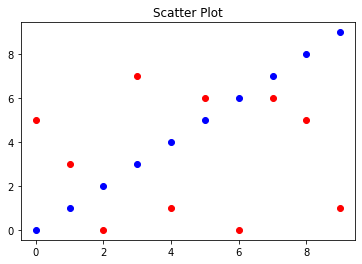

In [25]:

def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "Scatter Plot")